# Lab 7.07 - Time series analysis

In [1]:
# Package imports

## Exercise 7: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

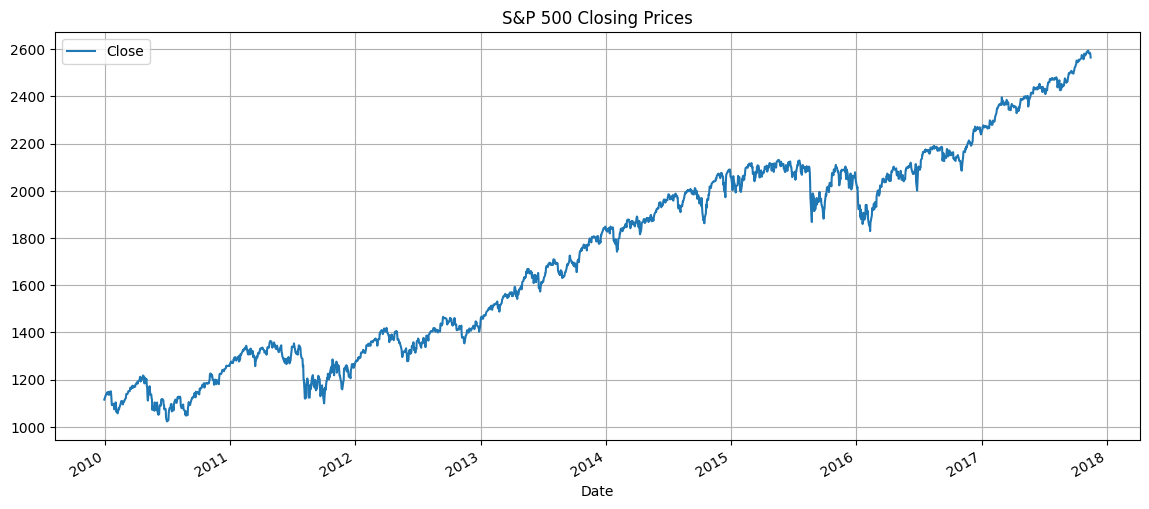

In [7]:
#  Importeren
import pandas as pd
import matplotlib.pyplot as plt

#  Stap 1: Laad de dataset
data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/SP500.csv',
    parse_dates=['Date'],
    index_col='Date'
)

#  Stap 2: Behoud alleen 'Close'-kolom
data = data[['Close']]

#  Stap 3: Plot S&P500 index
data.plot(figsize=(14, 6), title='S&P 500 Closing Prices')
plt.grid(True)
plt.show()


Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

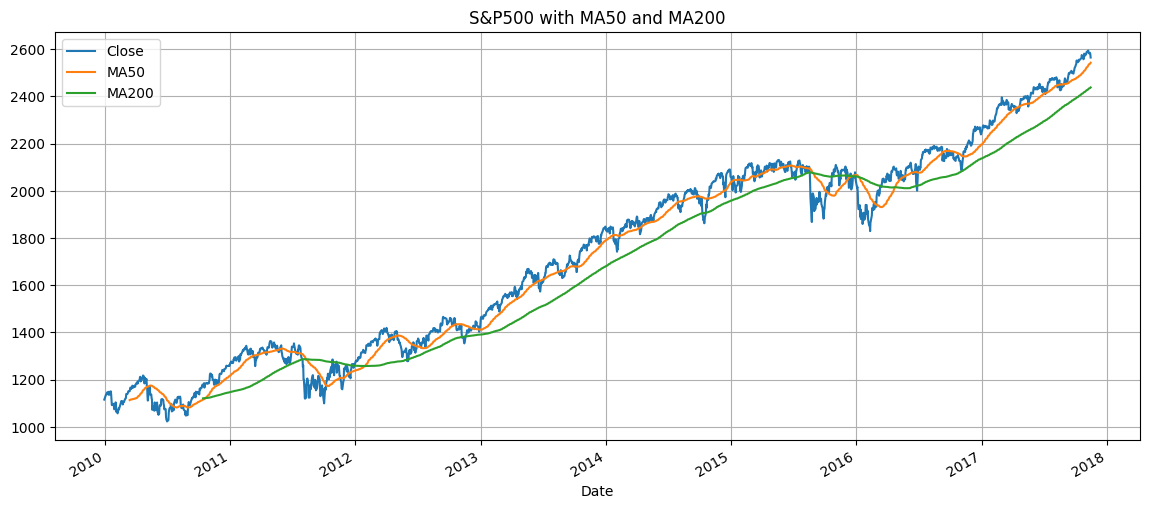

In [6]:
# 50- en 200-daagse gemiddelden
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot alles samen
data.plot(figsize=(14, 6), title='S&P500 with MA50 and MA200')
plt.grid(True)
plt.show()


- Plot the S&P500 index with both moving averages


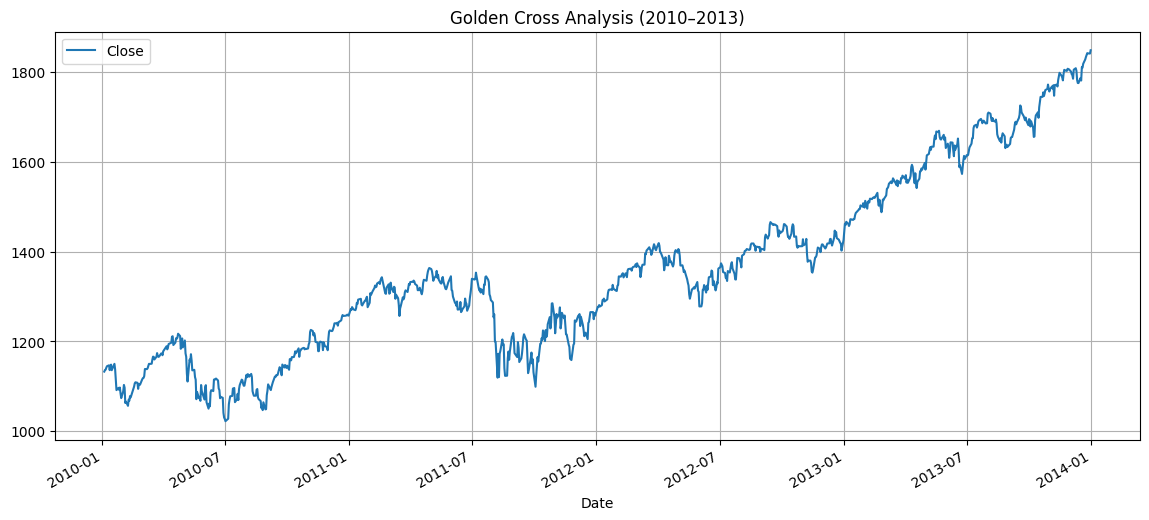

In [4]:
# Zoom in op de periode rond 2011
data_2010_2013 = data['2010-01-01':'2013-12-31']

data_2010_2013.plot(figsize=(14, 6), title='Golden Cross Analysis (2010–2013)')
plt.grid(True)
plt.show()


In [8]:
# Detecteer Golden Cross en Dead Cross momenten
cross = pd.DataFrame()
cross['MA50_above_MA200'] = data['MA50'] > data['MA200']
cross['Cross'] = cross['MA50_above_MA200'] != cross['MA50_above_MA200'].shift(1)
cross['Date'] = cross.index

# Filter enkel de datums waarop het verandert
cross_dates = cross[cross['Cross']]

# Toon datums en type kruising
for i in range(1, len(cross_dates)):
    prev = cross_dates.iloc[i - 1]
    curr = cross_dates.iloc[i]
    if curr['MA50_above_MA200']:
        print(f" Golden Cross op: {curr['Date'].date()}")
    else:
        print(f" Dead Cross op: {curr['Date'].date()}")


KeyError: 'MA50'


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029



---

##  Stap 1: Laad de dataset
Gebruik `Date` als index en houd enkel de kolom `Close` (slotkoers).

---

##  Stap 2: Visualiseer de tijdreeks
Bekijk of er duidelijke stijgingen/dalingen zijn over tijd.

---

##  Stap 3: Bereken Moving Averages
- `MA50`: gemiddelde van de laatste 50 dagen
- `MA200`: gemiddelde van de laatste 200 dagen

Voeg deze toe als nieuwe kolommen.

---

##  Stap 4: Plot met MA50 en MA200
Zoek naar kruispunten van de lijnen:
- **Golden Cross**: MA50 kruist **boven** MA200
- **Dead Cross**: MA50 kruist **onder** MA200

---

##  Stap 5: Analyseer 2011 crisis
Zoom in op 2010–2013:
- August 2011 = grote crash
- Na die val komen **twee golden crosses**

Bekijk hoe lang deze bull-markten duurden (totdat er weer een dead cross komt).

---

##  Stap 6: Gedraagt MA200 zich als support?
Kijk naar momenten waarop de prijs **dicht bij MA200** komt maar **niet doorzakt**, en snel weer stijgt. Dat wijst op een **ondersteuningsniveau**.

---

##  Termen uitgelegd

| Term           | Betekenis |
|----------------|-----------|
| **MA50**       | Gemiddelde koers over 50 dagen (kortetermijn) |
| **MA200**      | Gemiddelde koers over 200 dagen (langetermijn) |
| **Golden Cross** | MA50 kruist MA200 van onder naar boven → signaal voor bull market |
| **Dead Cross**   | MA50 kruist MA200 van boven naar onder → signaal voor bear market |
| **Support Level** | Ondergrens waar de koers vaak opveert na daling |



#  Golden Cross & Moving Averages

---

##  Wat is een Golden Cross?

Een **technisch patroon** dat optreedt wanneer: MA50 (kortetermijn) > MA200 (langetermijn)

→ Het signaleert een **mogelijke lange termijn stijging (bull market)**

---

##  Wat is een Dead Cross?

Het tegenovergestelde:


→ Signaal voor **mogelijke daling** of correctie

---

##  Waarom MA50 en MA200?

- MA50 = gemiddeld over laatste 10 weken
- MA200 = gemiddeld over laatste 40 weken
- Veel gebruikt door traders als **visuele trendindicatoren**

---

##  Wat is een Support Level?

Een **prijsniveau waar de koers op veert**, omdat:
- Kopers denken dat het "goedkoop" is
- MA200 functioneert soms als psychologische grens

---

##  Samenvattend

-  Golden Cross = koopmoment
-  Dead Cross = verkoopmoment
- MA200 = langetermijntrend en support
- Combineer met andere indicatoren voor betrouwbaarheid

